In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
def lamda(MTTF):
    return 1/MTTF

def distributionRel(x):
    return np.exp(x)

def serialSubsysRel(R1, R2):
    R = R1 * R2
    return R

def parallelSubsysRel(R1, R2):
    Q1 = 1 - R1
    Q2 = 1 - R2
    Q = Q1 * Q2
    R = 1 - Q
    return R


def ask1_erwthma2(Ci, i, T_c):
    lamda_i = lamda(Ci[0])
    points = 1000
    t = np.linspace(0, T_c, points)
    rel = - lamda_i*t
    rel = distributionRel(rel)
    # duty cycle
    d = Ci[1]
    rel = np.power(rel,d)
    #print "1.000 + 1.000 = %1.3f" % num # f represents a float
    #plt.title('x= '+str(x)+', y = '+str(y))
    plt.title('Component '+ str(i + 1) +' with duty cycle '+ str(d))
    #plt.title("Component %d with duty cycle %1.1f" %i %d)
    plt.ylabel("Reliability")
    plt.xlabel("Time interval $T_c$")
    plt.plot(t,rel)
    plt.show()
    return rel, lamda_i

### 1. Προσομοίωση σύνθετου συστήματος 

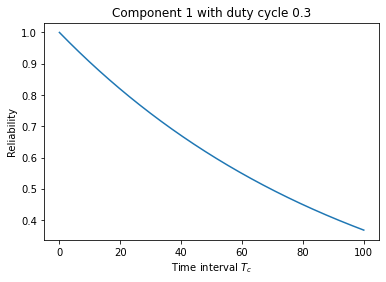

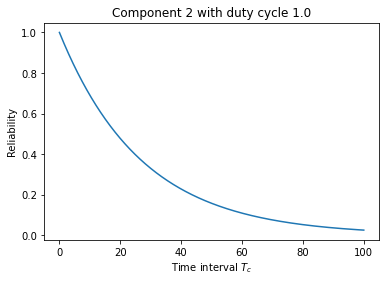

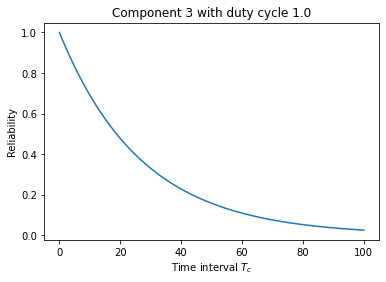

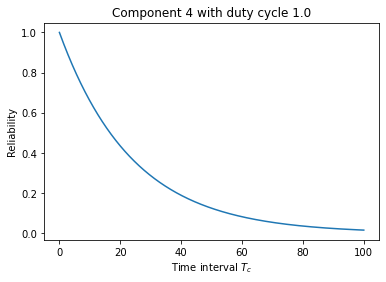

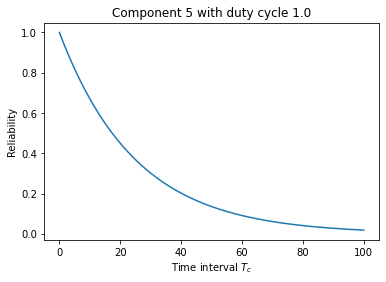

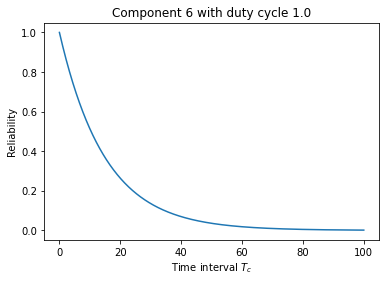

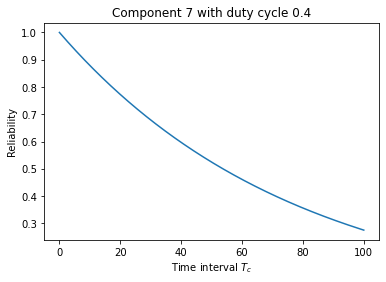

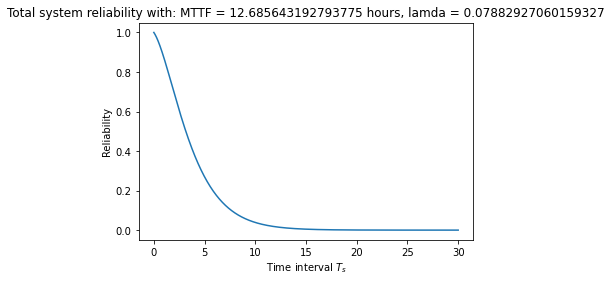

In [13]:
#mttf = 1/lamda
#N = 100 h 1000 epanalhpseis

# array : Ci , MTTF, Duty Cycle, MTTR
C1 = np.array([30, 0.3, 12])
C2 = np.array([27, 1, 12])
C3 = np.array([27, 1, 12])
C4 = np.array([24, 1, 10])
C5 = np.array([25, 1, 10])
C6 = np.array([15, 1, 8])
C7 = np.array([31, 0.4, 12])
# print(C1)
# data_C = np.ndarray(7, 3)
# print(data_C)
T_c = 100 #xronos meleths components
T_s = 30 #xronos meleths systhmatos

C = np.vstack((C1,C2,C3,C4,C5,C6,C7))
#print(type(C.shape[0])
Rel = np.zeros((7,1000))

lamdas = np.zeros((7,))

#print(Rel.shape)
for i in range(C.shape[0]):
    Rel[i, :], lamdas[i] = ask1_erwthma2(C[i], i, T_c) 
    #print(i)

    
# erwthma 3
R2_3 = parallelSubsysRel(Rel[1], Rel[2])
R4_5 = serialSubsysRel(Rel[3], Rel[4])
R4_5_6 = parallelSubsysRel(R4_5, Rel[5])

R_total = serialSubsysRel(serialSubsysRel(serialSubsysRel(Rel[0],R2_3), R4_5_6), Rel[6])
points = 1000
x = np.linspace(0, T_s, points)

# integration of reliability by trapezoidal rule
integral_space = np.linspace(0, T_c, points)
MTTF_total = np.trapz(R_total, integral_space)
#print(MTTF_total)
lamda_total = 1 / MTTF_total

plt.title('Total system reliability with: MTTF = '+ str(MTTF_total) + ' hours, lamda = '+ str(lamda_total))
plt.ylabel("Reliability")
plt.xlabel("Time interval $T_s$")
plt.plot(x, R_total)
plt.show()


# ignoring duty cycle erwthma 3
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

# def serialSubsysLam(lam1, lam2):
#     lam = lam1 * lam2
#     return lam

# def parallelSubsysLam(lam1, lam2):
#     lam = lam1*lam2* (lam1 + lam2) / (np.power(lam1, 2) + np.power(lam2, 2) + lam1*lam2)
#     return lam

# lam2_3 = parallelSubsysLam(lamdas[1], lamdas[2])
# lam4_5 = serialSubsysLam(lamdas[3], lamdas[4])
# lam4_5_6 = parallelSubsysLam(lam4_5, lamdas[5])

# lam1_2_3 = serialSubsysLam(lamdas[0], lam2_3)
# lam4_5_6_7 = serialSubsysLam(lam4_5_6, lamdas[6])

# lamdaTotal = serialSubsysLam(lam1_2_3, lam4_5_6_7)

# points = 1000
# t = np.linspace(0, T_s, points)
# relTotal = - lamdaTotal*t
# relTotal = distributionRel(relTotal)
# relTotal = NormalizeData(relTotal)
# #rel = np.power(rel,d)
# plt.title('Total system reliability according to lamdas and ignoring duty cycles')
# plt.ylabel("Reliability")
# plt.xlabel("Time interval $T_s$")
# plt.plot(t,relTotal)
# plt.show()






### 2. Προσομοίωση σύνθετου συστήματος με επιδιόρθωση

In [5]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 15px;
</style>